<h1> 예제 미국 대통령이 평균 신장은 얼마일까?

In [2]:
from sympy import series
from sympy.physics.units import inches
!head -4 ./president_heights.csv

order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189


In [3]:
import pandas as pd
import numpy as np

In [8]:
data = pd.read_csv('./president_heights.csv')
heights = np.array(data['height(cm)'])

data

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183
5,6,John Quincy Adams,171
6,7,Andrew Jackson,185
7,8,Martin Van Buren,168
8,9,William Henry Harrison,173
9,10,John Tyler,183


In [11]:
print(heights)

print('Mean height: ', heights.mean())
print('Standard deviation: ', heights.std())
print('Minimum height: ', heights.min())
print('Maximum height: ', heights.max())

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185 191 182]
Mean height:  180.04545454545453
Standard deviation:  6.983599441335736
Minimum height:  163
Maximum height:  193


Text(0, 0.5, 'number')

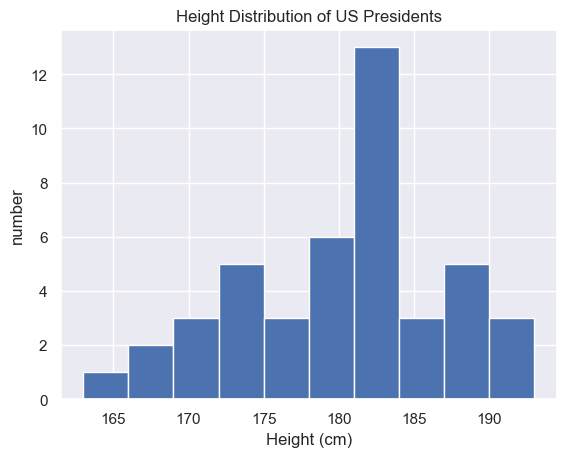

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('Height (cm)')
plt.ylabel('number')

<h1> 배열 연산: 브로드캐스팅
<h3> 브로드캐스팅 규칙

* 두 배열의 차원 수가 다르면 더 작은 수의 차원을 가진 배열 형상의 앞쪽(왼쪽)을 1로 채운다
* 두 배열의 형상이 어떤 차원에서도 일치하지 않는다면 해당 차원의 형상이 1인 배열이 다른 형상과 일치하도록 늘어난다
* 임의의 차원에서 크기가 일치하지 않고 1도 아니라면 오류가 발생한다

In [14]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])

print(a + b)
print(a + 5)


[5 6 7]
[5 6 7]


In [15]:
M = np.ones((3, 3))
print(M)

# a 는 1차원 배열이지만 2차원으로 확장해서 더해준다
print(M + a)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


In [16]:
# 예 1
M = np.ones((2, 3))
a = np.arange(3)
# M.shape(2, 3), a.shape(3, )이므로 규칙 1에 따라 a.shape(1, 3)이 된다
# 규칙 2에따라 첫 번째 차원이 일치하지 않으므로 이 차원이 일치하도록 늘린다 a.shape(2, 3)
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

In [18]:
# 예 2
a = np.arange(3).reshape((3, 1))
b = np.arange(3)

# a.shape(3, 1), b.shape(3, )이다 규칙 1에 따라 b.shape(1, 3)이 되야한다
# 규칙 2에따라 첫 번째 차원이 일치하지 않으므로 각 차원이 일치하도록 늘린다 a.shape(3, 3) b.shape(3, 3)

a + b 

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [19]:
# 예 3
M = np.ones((3, 2))
a = np.arange(3)

# M.shape(3, 2), a.shape(3, )이고 규칙 1에 따라 a.shape(1, 3)이 된다
# 규칙 2에 따라 a의 첫 번째 차원을 M의 첫 번째 차원과 일치하도록 늘린다. M.shape(3, 2), a.shape(3, 3)
# 규칙 3에 따라 최종 현상이 서로 일치하지 않으므로 오류다

M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

<h2> 브로드캐스트 실전

<h3> 배열을 중앙 정렬하기

In [25]:
X = np.random.random((10, 3))
print(X)

Xmean = X.mean(0)
print(Xmean)

X_centered = X - Xmean
print(X_centered)

print(X_centered.mean(0))

[[0.00789037 0.39514276 0.36327634]
 [0.23809766 0.58117392 0.21884446]
 [0.91439706 0.44125165 0.86388888]
 [0.5756018  0.16558318 0.68611709]
 [0.10795797 0.61824215 0.39757061]
 [0.98331641 0.27808281 0.21099626]
 [0.57363082 0.60644253 0.42235193]
 [0.06001027 0.85952502 0.54008148]
 [0.60296285 0.98014221 0.16687503]
 [0.60491857 0.97667504 0.63425296]]
[0.46687838 0.59022613 0.4504255 ]
[[-0.45898801 -0.19508337 -0.08714916]
 [-0.22878072 -0.00905221 -0.23158105]
 [ 0.44751868 -0.14897448  0.41346337]
 [ 0.10872342 -0.42464294  0.23569159]
 [-0.35892041  0.02801602 -0.05285489]
 [ 0.51643804 -0.31214332 -0.23942925]
 [ 0.10675244  0.01621641 -0.02807357]
 [-0.40686811  0.26929889  0.08965598]
 [ 0.13608448  0.38991608 -0.28355047]
 [ 0.13804019  0.38644891  0.18382746]]
[-7.77156117e-17  6.66133815e-17 -5.55111512e-17]


<h3> 2차원 함수 플로팅하기

In [28]:
# x, y는 0에서 5까지 50단계로 나눈 배열이다
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

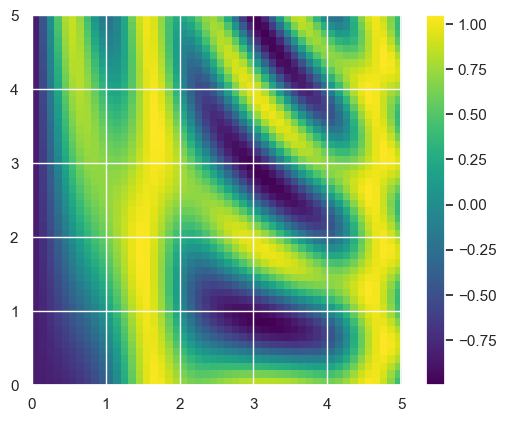

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(z, origin='lower', extent=[0, 5, 0, 5], cmap='viridis')
plt.colorbar()

<h1> 비교, 마스크, 부울 로직
<h3> 마스킹은 특정 기준에 따라 배열의 값을 추출하거나 수정, 계산, 조작할 때 사용한다

In [51]:
x = np.arange(6)
print(x > 4)

x = np.random.random((3, 3))
print(x > 0.5)

[False False False False False  True]
[[ True False  True]
 [False  True  True]
 [False  True False]]


In [53]:
# 요소 개수 세기
x = np.arange(10)
np.count_nonzero(x > 6)

# 6보다 큰 값이 하나라도 있는가?
print(np.any(x > 6))

# 모든 값이 10보다 작은가?
print(np.any(x < 10))

True
True


<h3> 부울 연산자
<h4>

* & : and
* | : or
* ^ : Xor
* ~ : Not

In [58]:
X = np.random.random((3, 3))

print(X < 0.2)

# 배열 bool, 마스킹 연산
print(X[X < 0.2])

[[False False  True]
 [False False False]
 [False False False]]
[0.05477986]


<h3> 팬시 인덱싱

In [60]:
rand = np.random.RandomState(42)
x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [63]:
# 세 개의 요소 접근
print([x[3], x[7], x[2]])

# 배열 전달로 요소 접근
idx = [3, 7, 4]
print(x[idx])

# 팬시 인덱싱을 이용하면 결과의 형상이 인덱싱 대상 배열의 형상이 아니라 인덱스 배열의 형상을 반영한다
idx = np.array([[3, 7], [4, 5]])
x[idx]

[71, 86, 14]
[71 86 60]


array([[71, 86],
       [60, 20]])

<h3> 임의의 점 선택하기

In [64]:
mean = [0,0]
cov = [[1, 2], [2, 5]]

X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

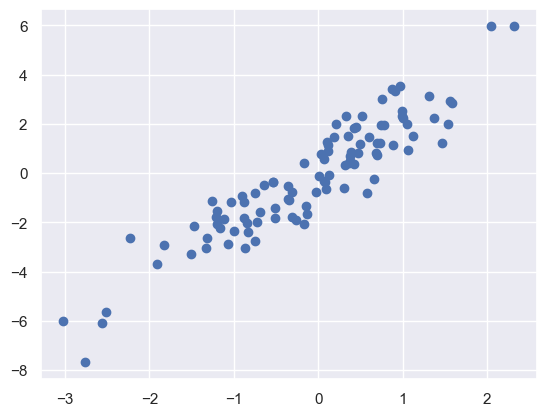

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

# 정규 분포된 점들
plt.scatter(X[:, 0], X[:, 1])

In [68]:
# 팬시 인덱싱을 통해 임의의 점 20개 선택하자
indices = np.random.choice(X.shape[0], 20, replace=False)
print(indices)

selection = X[indices] # 팬싱 인덱싱 사용
selection.shape

[56 50 45  1 33 71 51 10 90 79 67 40 38 81 26 17 88 13  4 11]


(20, 2)

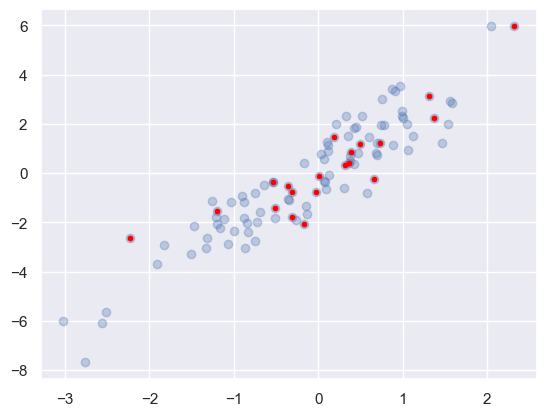

In [80]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1], facecolor='red', s=10)